#                          **TITANIC DATASET**
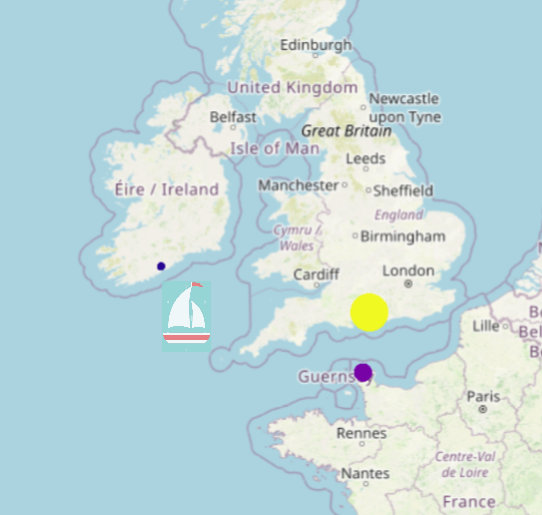

**En primer lugar, se descargaran las librerias que se van a usar en este proyecto, se leera el dataset y se dara un primer vistazo al mismo**

In [222]:
# Descarga de las librerias que se van a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px




In [223]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [224]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**A continuación, se limpiara el dataset y se ajustara a las necesidades de este análisis**
* Eliminación columnas, NAN y duplicados
* Se coloca el Passanger ID como índice
* Renombramiento de las columnas
* Cambio el tipo de dato en varias columnas para evitar decimales
* Cambio el contenido de los puertos de embarque para ver el nombre completo de los mismos
* Creación de dos columnas nuevas de la latitud y longuitud de los puertos para poder realizar un mapa con estos puntos
* Creo una columna condicional para ver cuantos menores de edad hay en el barco

In [225]:
#Eliminamos las columnas que no voy a usar para el análisis, ticket y Cabin
df.drop(['Ticket','Cabin'], axis=1,inplace =True)
#Elimino los NaN de Edad y las columnas que no vamos a utilizar y duplicados de toda la tabla
df.dropna(subset=['Age'],inplace=True)
df.drop_duplicates(inplace=True)
#El Passenger ID lo coloco en el idice para una mejor visualización
df.reset_index(drop=True, inplace=True)
df.set_index('PassengerId',inplace=True)



In [226]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S


In [227]:

# Renombrar columnas para una mayor comprensión
df.rename(columns={'PassengerId':'IDPasajeros','Survived':'Supervivientes','Pclass':'Clase','Name':'Nombre','Sex':'Sexo', 'Age':'Edad','SibSp':'Nºher/espo','Parch':'NºHijos','Fare':'Precio','Embarked':'Puerto de Embarque'},inplace = True)
df

,Supervivientes,Clase,Nombre,Sexo,Edad,Nºher/espo,NºHijos,Precio,Puerto de Embarque
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S


In [228]:

#Veo que varias columnas tienen formato decimal cuando deberían ser integros, los cambiamos y quitamos los decimales del precio para una mejor lectura
df['Nombre'] = df['Nombre'].astype('string')
df ['Sexo'] = df['Sexo'].astype('string')
df['Edad'] = df['Edad'].astype('uint64')
df['Precio'] = df['Precio'].astype ('uint64')

#Cambio datos Puerto de Embarque para que se entienda mejor de donde salio el Titanic
valores_antiguos=['S','C','Q']
nuevos_valores = ['Southampton','Cherbourg','Queenstown']
df['Puerto de Embarque'].replace(valores_antiguos,nuevos_valores, inplace = True)



df


,Supervivientes,Clase,Nombre,Sexo,Edad,Nºher/espo,NºHijos,Precio,Puerto de Embarque
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,Southampton
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,Cherbourg
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7,Southampton
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,Southampton
5,0,3,"Allen, Mr. William Henry",male,35,0,0,8,Southampton
...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,29,Queenstown
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13,Southampton
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30,Southampton


In [229]:
# Creo dos columnas nuevas con la latitud y longitud de los puertos
coordenadas = {
    'Southampton': (50.90395, -1.40428),
    'Cherbourg': (49.6398400,-1.6163600 ),
    'Queenstown': (51.85046,  -8.2948),
}

# Utilizo el método map() para crear la nueva columna 'Coordenadas' utilizando el diccionario de coordenadas
df['Coordenadas'] = df['Puerto de Embarque'].map(coordenadas)

# Utilizo apply() para aplicar una función lambda que extrae la latitud y longitud de cada tupla
df[['Latitud', 'Longitud']] = df['Coordenadas'].apply(lambda x: pd.Series(x))

# Elimino la columna 'Coordenadas' si ya no la necesitas
df.drop(columns=['Coordenadas'], inplace=True)

df

,Supervivientes,Clase,Nombre,Sexo,Edad,Nºher/espo,NºHijos,Precio,Puerto de Embarque,Latitud,Longitud
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,Southampton,50.90395,-1.40428
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,Cherbourg,49.63984,-1.61636
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7,Southampton,50.90395,-1.40428
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,Southampton,50.90395,-1.40428
5,0,3,"Allen, Mr. William Henry",male,35,0,0,8,Southampton,50.90395,-1.40428
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,29,Queenstown,51.85046,-8.29480
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13,Southampton,50.90395,-1.40428
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30,Southampton,50.90395,-1.40428


In [230]:
#Creamos 1 columna condicional para ver cuales de los pasajeros era menores
df['Clasificacion Edad'] = ['Menor' if edad <=18 else 'Mayor'for edad in df['Edad']]
menores_edad = (df['Clasificacion Edad']== 'Menor').sum()
menores_edad
df

,Supervivientes,Clase,Nombre,Sexo,Edad,Nºher/espo,NºHijos,Precio,Puerto de Embarque,Latitud,Longitud,Clasificacion Edad
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,Southampton,50.90395,-1.40428,Mayor
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,Cherbourg,49.63984,-1.61636,Mayor
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7,Southampton,50.90395,-1.40428,Mayor
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,Southampton,50.90395,-1.40428,Mayor
5,0,3,"Allen, Mr. William Henry",male,35,0,0,8,Southampton,50.90395,-1.40428,Mayor
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,29,Queenstown,51.85046,-8.29480,Mayor
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13,Southampton,50.90395,-1.40428,Mayor
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30,Southampton,50.90395,-1.40428,Mayor


**Visualización del precio del ticket según la clase**

In [231]:
#Vemos los diferentes precios según la clase
df[['Clase','Precio']].head(10)

,Clase,Precio
PassengerId,,
1,3,7
2,1,71
3,3,7
4,1,53
5,3,8
7,1,51
8,3,21
9,3,11
10,2,30


**Creo la primera gráfica con la que se puede observar el género de los pasajeros**

In [232]:
# Calculamos el número de pasajeros de cada sexo
males_count = (df['Sexo']=='male').sum()
females_count = (df['Sexo']== 'female').sum()

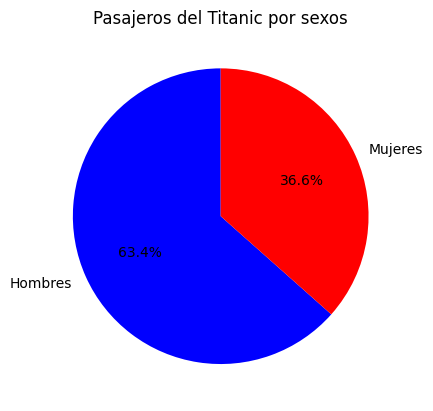

In [233]:
# Creamos un gráfico para visualizar que genero es el predeminante
plt.pie(
    # Valores a representar
    [males_count, females_count],
    # Etiquetas
    labels = ['Hombres', 'Mujeres'],
   
    # Colores
    colors = ['blue', 'red'],
    # Ángulo de inicio
    startangle = 90,
    # Mostramos el valor como un valor porcentual con un dígito decimal
    autopct = '%1.1f%%'
    )

# Especificamos el título del gráfico
plt.title("Pasajeros del Titanic por sexos")

# Mostramos el gráfico
plt.show()

Vemos que hay un mayor número de hombres. **¿Habran sobrevivido mas hombres o mujeres?**

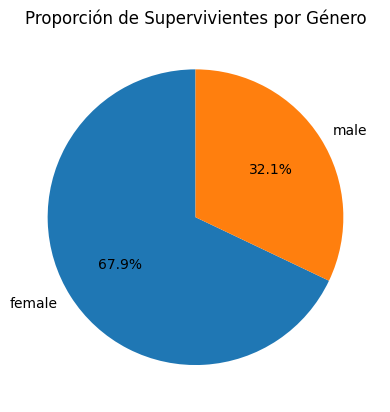

In [234]:
#Gráfica supervivientes según el género
supervivientes = df[df['Supervivientes'] == 1]

# Conteo de supervivientes por género
conteo_supervivientes_por_genero = supervivientes['Sexo'].value_counts()

# Gráfico de pie
fig, ax = plt.subplots()
ax.pie(conteo_supervivientes_por_genero, labels=conteo_supervivientes_por_genero.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Proporción de Supervivientes por Género')

# Mostrar el gráfico
plt.show()

Pues vista la gráfica vemos que aún habiendo más hombres en el barco, sobrevivieron más mujeres. Por lo que la teoría de que dejaron montarse antes en los barcos salvavidas a mujeres y niños.
**¿Será verdad en cuanto a los niños?**

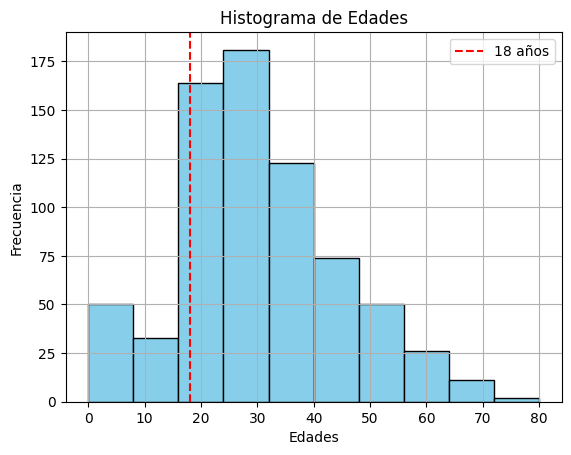

In [235]:
#En el siguiente gráfico veremos las diferentes edades dentro del barco
plt.hist(df['Edad'], bins=10, color='skyblue', edgecolor='black')  # bins define el número de contenedores
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.grid(True)  # Agrega una cuadrícula al gráfico
# Agregar una línea vertical en la edad de 18 años
plt.axvline(x=18, color='red', linestyle='--', label='18 años')

# Mostrar el histograma
plt.legend()
plt.show()



En este gráfico observamos cuanta gente es mayor de edad, pero como queremos saber el número total contaremos cuantos menores hay

In [236]:
mayores_count = (df['Edad'] > 18).sum()
mayores_count

575

In [237]:
menores_count = (df['Edad'] <= 18).sum()
menores_count

139

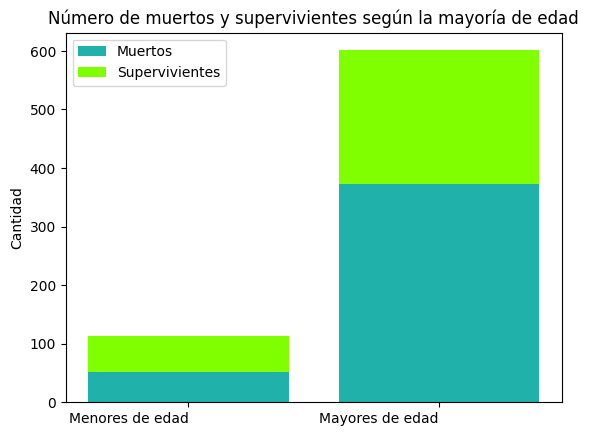

In [238]:
#En la siguiente gráfica veremos si existe una correlación entre la edad y los supervivientes
# Contar muertos y supervivientes por grupo de edad
muertos_menores = ((df['Supervivientes'] == 0) & (df['Edad'] <18)).sum()
muertos_mayores = ((df['Supervivientes'] == 0) & (df['Edad']>=18)).sum()
supervivientes_menores = ((df['Supervivientes'] == 1) & (df['Edad'] < 18)).sum()
supervivientes_mayores = ((df['Supervivientes'] == 1) & (df['Edad'] >=18)).sum()
# Crear gráfico de barras
fig, ax = plt.subplots()
ax.bar([0, 1], [muertos_menores, muertos_mayores], label='Muertos', color='lightseagreen')
ax.bar([0, 1], [supervivientes_menores, supervivientes_mayores], bottom=[muertos_menores, muertos_mayores],
       label='Supervivientes', color='chartreuse')


# Etiquetas y leyenda
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Menores de edad', 'Mayores de edad'], ha='right')
plt.title('Número de muertos y supervivientes según la mayoría de edad')
plt.legend()

# Mostrar gráfico
plt.show()




A continuación observaremos si según fueras de una clase u otra tenias más posibilidades de sobrevivir. En primer lugar, realizaré una gráfica en la que observaremos la supervivencia según la clase social.

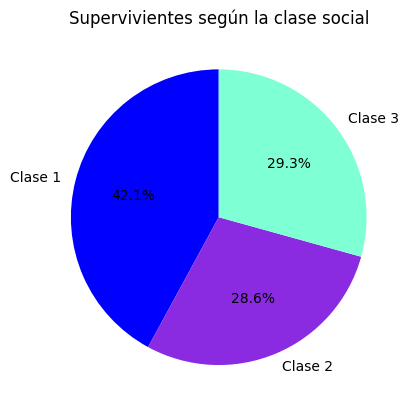

In [239]:
# Calcular el número de supervivientes por clase social
supervivientes_clase1 = ((df['Clase'] == 1) & (df['Supervivientes'] == 1)).sum()
supervivientes_clase2 = ((df['Clase'] == 2) & (df['Supervivientes'] == 1)).sum()
supervivientes_clase3 = ((df['Clase'] == 3) & (df['Supervivientes'] == 1)).sum()

plt.pie(
    # Valores a representar
    [supervivientes_clase1,supervivientes_clase2, supervivientes_clase3],
    # Etiquetas
    labels = ['Clase 1', 'Clase 2','Clase 3'],

    # Colores
    colors = ['blue', 'blueviolet','aquamarine'],
    # Ángulo de inicio
    startangle = 90,
    # Mostramos el valor como un valor porcentual con un dígito decimal
    autopct = '%1.1f%%'
    )

# Especificamos el título del gráfico
plt.title("Supervivientes según la clase social")

# Mostramos el gráfico
plt.show()
 
 



 
 
 


Aquí podemos ver que la clase social influye en los supervivientes y vemos que el 42% de la primera clase logro sobrevivir frente a un 28.6% de la clase 2 y el 29.3% de la clase 3. Por lo que si se puede observar que los de 1 clase tenían más posibilidades de sobrevivir. Probablemente porque se alojaban en cabinas más altas.

A continuación quería ver si existía relación entre la clase social y el puerto en el que salian. Para ello hice dos gráficas aparentemente iguales:
1. En esta aparecen las personas que salieron de los 3 puertos de embarque y están divididos según la clase social
2. En la segunda aparecen los supervivientes divididos por clase y puerto de embarque

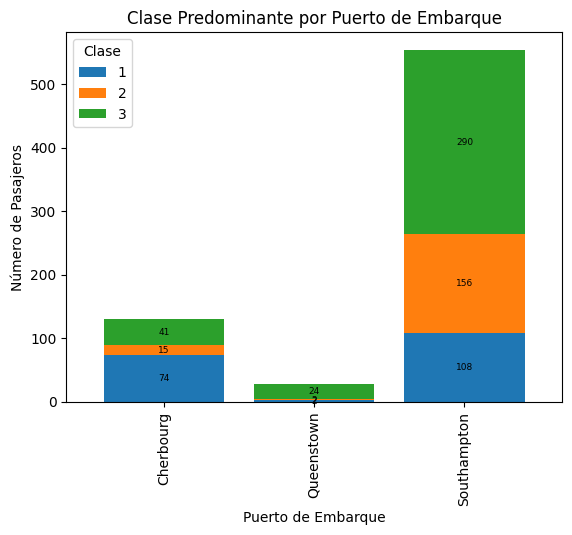

In [243]:
#Gráfica para ver clase predominante en cada puerto
# Conteo de la clase predominante en cada puerto de embarque
conteo_por_clase_y_puerto = df.groupby(['Puerto de Embarque', 'Clase']).size().unstack(fill_value=0)

# Gráfico de barras apiladas
fig, ax = plt.subplots()
conteo_por_clase_y_puerto.plot(kind='bar', stacked=True, ax=ax,width = 0.8)

# Configuración de etiquetas y título
ax.set_xlabel('Puerto de Embarque')
ax.set_ylabel('Número de Pasajeros')
ax.set_title('Clase Predominante por Puerto de Embarque')
# Agregar etiquetas con los números al lado de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=6.5)
# Mostrar el gráfico
plt.show()

En esta observamos el mayor número de personas eran de 3 clase seguidos de la primera y finalmente segunda

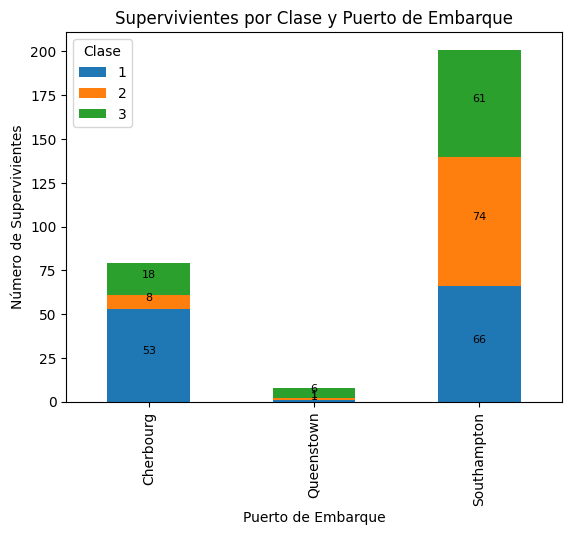

In [244]:
# Gráfica supervivientes por clase y puerto
# Filtrar el DataFrame para obtener solo los supervivientes
supervivientes = df[df['Supervivientes'] == 1]

# Conteo de supervivientes por clase y puerto de embarque
conteo_supervivientes_por_clase_y_puerto = supervivientes.groupby(['Puerto de Embarque', 'Clase']).size().unstack(fill_value=0)

# Gráfico de barras apiladas
fig, ax = plt.subplots()
conteo_supervivientes_por_clase_y_puerto.plot(kind='bar', stacked=True, ax=ax)

# Configuración de etiquetas y título
ax.set_xlabel('Puerto de Embarque')
ax.set_ylabel('Número de Supervivientes')
ax.set_title('Supervivientes por Clase y Puerto de Embarque')
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, padding=3, color='black', fmt='%d')

# Mostrar el gráfico
plt.show()

Y en esta vemos que sobrevivivieron más personas de primera clase que de segunda y de primera. Aún habiendo en el barco más personas de tercera clase que de primera

In [242]:
# Gráfica puertos de embarque y cantidad de personas que salieron desde esos lugares
fig = px.scatter_mapbox(df, lat = 'Latitud', lon = 'Longitud', size = 'Total_personas_puerto',
                        color = 'Total_personas_puerto',
                        zoom = 4, mapbox_style = 'open-street-map')
                        
fig.show()

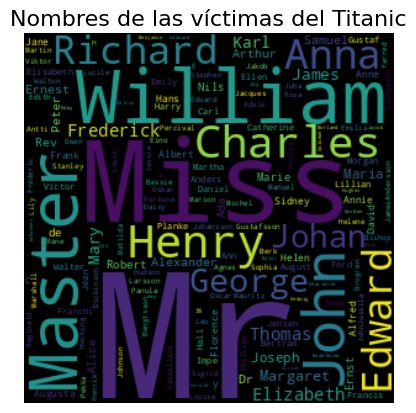

In [245]:
# Nube de palabras con los nombres de las personas abordo del Titanic
from wordcloud import WordCloud

texto = df['Nombre'].astype(str)
wc = WordCloud(width = 300, height = 300).generate(''.join(texto))

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt. title('Nombres de las víctimas del Titanic', fontsize = 16)

plt.show()